In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from tensorflow import keras as kr

In [4]:
df = pd.read_csv("diamonds.csv")
df.head(2)

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31

In [5]:
df_dum = pd.get_dummies(df)
df_dum.head(1)

carat  depth  table  price     x     y     z  cut_Fair  cut_Good  \
0   0.23   61.5   55.0    326  3.95  3.98  2.43         0         0   

   cut_Ideal  ...  color_I  color_J  clarity_I1  clarity_IF  clarity_SI1  \
0          1  ...        0        0           0           0            0   

   clarity_SI2  clarity_VS1  clarity_VS2  clarity_VVS1  clarity_VVS2  
0            1            0            0             0             0  

[1 rows x 27 columns]

In [6]:
df_train, df_test = train_test_split(df_dum, train_size = 0.7,
                                     random_state = 123)
len(df_train)

37758

In [7]:
model_nor = StandardScaler()
df_train_nor = model_nor.fit_transform(df_train.drop("price", axis = 1))
df_test_nor  = model_nor.transform(    df_test.drop( "price", axis = 1))

In [6]:
input_shape = [df_train_nor.shape[1]]

model1 = kr.Sequential([kr.layers.Dense(32, 
                                        activation = "relu", 
                                        input_shape = input_shape),
                        kr.layers.Dense(16, activation = "relu"),
                        kr.layers.Dense(1)])
model1.compile(loss = "mse",
               optimizer = kr.optimizers.RMSprop(learning_rate = 0.01),
               metrics = ["mae", "mse"])
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                864       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1,409
Trainable params: 1,409
Non-trainable params: 0
_________________________________________________________________


In [7]:
hist1 = model1.fit(df_train_nor, df_train["price"],
                   epochs = 100, 
                   validation_split = 0.2, 
                   verbose = 1)

Epoch 1/100
944/944 [==============================] - 4s 4ms/step - loss: 4365367.5000 - mae: 998.9627 - mse: 4365367.5000 - val_loss: 605455.3125 - val_mae: 467.3015 - val_mse: 605455.3125
Epoch 2/100
944/944 [==============================] - 3s 3ms/step - loss: 945204.1250 - mae: 455.7228 - mse: 945204.1250 - val_loss: 487936.2188 - val_mae: 403.6270 - val_mse: 487936.2188
Epoch 3/100
944/944 [==============================] - 4s 4ms/step - loss: 857146.8125 - mae: 411.7869 - mse: 857146.8125 - val_loss: 425210.5312 - val_mae: 369.2534 - val_mse: 425210.5312
Epoch 4/100
944/944 [==============================] - 6s 6ms/step - loss: 794023.8125 - mae: 390.4718 - mse: 794023.8125 - val_loss: 398375.2812 - val_mae: 350.8221 - val_mse: 398375.2812
Epoch 5/100
944/944 [==============================] - 6s 7ms/step - loss: 765088.0000 - mae: 377.7034 - mse: 765088.0000 - val_loss: 371391.2812 - val_mae: 337.3097 - val_mse: 371391.2812
Epoch 6/100
944/944 [==============================] 

944/944 [==============================] - 6s 6ms/step - loss: 344849.6562 - mae: 317.6054 - mse: 344849.6562 - val_loss: 310189.2812 - val_mae: 305.7673 - val_mse: 310189.2812
Epoch 88/100
944/944 [==============================] - 6s 6ms/step - loss: 344433.7188 - mae: 317.1760 - mse: 344433.7188 - val_loss: 296003.8438 - val_mae: 296.0113 - val_mse: 296003.8438
Epoch 89/100
944/944 [==============================] - 5s 6ms/step - loss: 342272.2188 - mae: 316.4961 - mse: 342272.2188 - val_loss: 289728.0625 - val_mae: 295.9491 - val_mse: 289728.0625
Epoch 90/100
944/944 [==============================] - 6s 6ms/step - loss: 338802.5312 - mae: 316.0232 - mse: 338802.5312 - val_loss: 280436.4688 - val_mae: 290.1600 - val_mse: 280436.4688
Epoch 91/100
944/944 [==============================] - 5s 6ms/step - loss: 339761.5938 - mae: 316.0235 - mse: 339761.5938 - val_loss: 285859.7500 - val_mae: 295.1812 - val_mse: 285859.7500
Epoch 92/100
944/944 [==============================] - 6s 6ms/

In [8]:
df_hist1 = pd.DataFrame(hist1.history)
df_hist1["epoch"] = hist1.epoch
df_hist1.head(2)

loss         mae          mse      val_loss     val_mae  \
0  4365367.500  998.962708  4365367.500  605455.31250  467.301544   
1   945204.125  455.722809   945204.125  487936.21875  403.626984   

        val_mse  epoch  
0  605455.31250      0  
1  487936.21875      1

In [9]:
df_hist1[["epoch", "mse", "val_mse"]].plot.line(x = "epoch")

<AxesSubplot:xlabel='epoch'>

In [18]:
pred1 = model1.predict(df_test_nor)
pred1 = pred1.transpose()[0]

506/506 [==============================] - 1s 2ms/step


In [20]:
mean_squared_error(y_true = df_test["price"],
                   y_pred = pred1) ** 0.5

168942.3816477474

In [24]:
df_check = pd.DataFrame({"y_true": df_test["price"],
                         "y_pred": pred1}).reset_index(drop = True)
df_check["error"] = df_check["y_pred"] - df_check["y_true"]
df_check.head()

y_true       y_pred       error
0     802   653.773254 -148.226746
1     935  1003.253967   68.253967
2    5826  5949.286621  123.286621
3     935  1080.685181  145.685181
4    2817  3127.216309  310.216309

In [20]:
input_shape

[26]

In [10]:
model2 = kr.Sequential([kr.layers.Dense(32, 
                                        activation = "relu", 
                                        input_shape = input_shape),
                        kr.layers.Dense(16, activation = "relu"),
                        kr.layers.Dense(16, activation = "relu"),
                        kr.layers.Dense(1)])
model2.compile(loss = "mse",
               optimizer = kr.optimizers.RMSprop(learning_rate = 0.01),
               metrics = ["mae", "mse"])

In [25]:
hist2 = model2.fit(df_train_nor, df_train["price"],
                   epochs = 100, 
                   validation_split = 0.2, 
                   verbose = 1)

Epoch 1/100
944/944 [==============================] - 7s 7ms/step - loss: 2334753.0000 - mae: 670.3851 - mse: 2334753.0000 - val_loss: 477843.2812 - val_mae: 389.4633 - val_mse: 477843.2812
Epoch 2/100
944/944 [==============================] - 6s 7ms/step - loss: 855502.5000 - mae: 410.0154 - mse: 855502.5000 - val_loss: 408645.6875 - val_mae: 350.9675 - val_mse: 408645.6875
Epoch 3/100
944/944 [==============================] - 7s 7ms/step - loss: 754398.5625 - mae: 390.1623 - mse: 754398.5625 - val_loss: 376642.3750 - val_mae: 334.6796 - val_mse: 376642.3750
Epoch 4/100
944/944 [==============================] - 6s 7ms/step - loss: 696620.8125 - mae: 384.1215 - mse: 696620.8125 - val_loss: 433176.1562 - val_mae: 372.7410 - val_mse: 433176.1562
Epoch 5/100
944/944 [==============================] - 7s 7ms/step - loss: 730585.8125 - mae: 375.1658 - mse: 730585.8125 - val_loss: 358390.3438 - val_mae: 327.8902 - val_mse: 358390.3438
Epoch 6/100
944/944 [==============================] 

944/944 [==============================] - 7s 7ms/step - loss: 394352.0312 - mae: 330.7733 - mse: 394352.0312 - val_loss: 328329.0312 - val_mae: 315.6369 - val_mse: 328329.0312
Epoch 88/100
944/944 [==============================] - 7s 7ms/step - loss: 390636.0625 - mae: 329.6961 - mse: 390636.0625 - val_loss: 296957.4688 - val_mae: 294.0175 - val_mse: 296957.4688
Epoch 89/100
944/944 [==============================] - 7s 7ms/step - loss: 384974.5938 - mae: 326.7635 - mse: 384974.5938 - val_loss: 309326.1562 - val_mae: 307.2224 - val_mse: 309326.1562
Epoch 90/100
944/944 [==============================] - 7s 8ms/step - loss: 387875.7188 - mae: 329.5410 - mse: 387875.7188 - val_loss: 310546.0938 - val_mae: 304.1987 - val_mse: 310546.0938
Epoch 91/100
944/944 [==============================] - 7s 8ms/step - loss: 388891.4688 - mae: 329.6354 - mse: 388891.4688 - val_loss: 330712.9375 - val_mae: 314.3398 - val_mse: 330712.9375
Epoch 92/100
944/944 [==============================] - 7s 7ms/

<AxesSubplot:xlabel='epoch'>

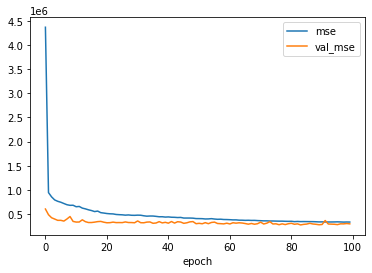

In [26]:
df_hist2 = pd.DataFrame(hist1.history)
df_hist2["epoch"] = hist1.epoch
df_hist2[["epoch", "mse", "val_mse"]].plot.line(x = "epoch")

In [35]:
pred2 = model2.predict(df_test_nor).transpose()[0]
print(mean_squared_error(y_true = df_test["price"], y_pred = pred2),
      mean_absolute_percentage_error(y_true = df_test["price"], y_pred = pred2))
df_check = pd.DataFrame({"y_true": df_test["price"],
                         "y_pred": pred2}).reset_index(drop = True)
df_check["error"] = df_check["y_pred"] - df_check["y_true"]
df_check.head()

506/506 [==============================] - 1s 2ms/step
383247.12461314426 0.0905610096590131


y_true       y_pred       error
0     802   738.890869  -63.109131
1     935   804.256958 -130.743042
2    5826  6136.459473  310.459473
3     935   960.882507   25.882507
4    2817  3281.291260  464.291260

In [28]:
model3 = kr.Sequential([kr.layers.Dense(32, 
                                        activation = "relu", 
                                        input_shape = input_shape),
                        kr.layers.Dense(16, activation = "relu"),
                        kr.layers.Dense(8, activation = "relu"),
                        kr.layers.Dense(1)])
model3.compile(loss = "mse",
               optimizer = kr.optimizers.RMSprop(learning_rate = 0.01),
               metrics = ["mae", "mse"])

In [29]:
hist3 = model3.fit(df_train_nor, df_train["price"],
                   epochs = 100, 
                   validation_split = 0.2, 
                   verbose = 2)

Epoch 1/100
944/944 - 7s - loss: 2163546.7500 - mae: 647.1368 - mse: 2163546.7500 - val_loss: 452429.5312 - val_mae: 383.9413 - val_mse: 452429.5312 - 7s/epoch - 7ms/step
Epoch 2/100
944/944 - 6s - loss: 847453.4375 - mae: 408.5999 - mse: 847453.4375 - val_loss: 465359.5000 - val_mae: 378.2164 - val_mse: 465359.5000 - 6s/epoch - 6ms/step
Epoch 3/100
944/944 - 6s - loss: 765483.4375 - mae: 388.3092 - mse: 765483.4375 - val_loss: 391086.4062 - val_mae: 349.1975 - val_mse: 391086.4062 - 6s/epoch - 6ms/step
Epoch 4/100
944/944 - 6s - loss: 706594.1875 - mae: 381.3463 - mse: 706594.1875 - val_loss: 369676.3125 - val_mae: 340.0397 - val_mse: 369676.3125 - 6s/epoch - 7ms/step
Epoch 5/100
944/944 - 5s - loss: 734327.6250 - mae: 375.1970 - mse: 734327.6250 - val_loss: 375713.7500 - val_mae: 339.0359 - val_mse: 375713.7500 - 5s/epoch - 5ms/step
Epoch 6/100
944/944 - 6s - loss: 683222.9375 - mae: 368.7625 - mse: 683222.9375 - val_loss: 350631.5312 - val_mae: 325.8055 - val_mse: 350631.5312 - 6s/e

Epoch 50/100
944/944 - 6s - loss: 413707.8125 - mae: 338.4165 - mse: 413707.8125 - val_loss: 312030.2500 - val_mae: 304.6894 - val_mse: 312030.2500 - 6s/epoch - 6ms/step
Epoch 51/100
944/944 - 6s - loss: 411505.0312 - mae: 337.4497 - mse: 411505.0312 - val_loss: 375830.2812 - val_mae: 341.4366 - val_mse: 375830.2812 - 6s/epoch - 6ms/step
Epoch 52/100
944/944 - 6s - loss: 417828.8125 - mae: 338.5897 - mse: 417828.8125 - val_loss: 391686.2812 - val_mae: 347.1906 - val_mse: 391686.2812 - 6s/epoch - 6ms/step
Epoch 53/100
944/944 - 6s - loss: 414980.9062 - mae: 337.0842 - mse: 414980.9062 - val_loss: 387545.2188 - val_mae: 337.4618 - val_mse: 387545.2188 - 6s/epoch - 6ms/step
Epoch 54/100
944/944 - 6s - loss: 418240.3750 - mae: 334.5742 - mse: 418240.3750 - val_loss: 325177.2188 - val_mae: 310.4669 - val_mse: 325177.2188 - 6s/epoch - 6ms/step
Epoch 55/100
944/944 - 5s - loss: 409022.5312 - mae: 336.7028 - mse: 409022.5312 - val_loss: 341034.8125 - val_mae: 315.3089 - val_mse: 341034.8125 - 

Epoch 99/100
944/944 - 5s - loss: 376378.0938 - mae: 324.9852 - mse: 376378.0938 - val_loss: 330261.5000 - val_mae: 308.8770 - val_mse: 330261.5000 - 5s/epoch - 5ms/step
Epoch 100/100
944/944 - 5s - loss: 370880.7812 - mae: 323.4463 - mse: 370880.7812 - val_loss: 305201.5938 - val_mae: 293.9108 - val_mse: 305201.5938 - 5s/epoch - 5ms/step


In [34]:
pred = model3.predict(df_test_nor).transpose()[0]
print(mean_squared_error(y_true = df_test["price"], y_pred = pred),
      mean_absolute_percentage_error(y_true = df_test["price"], y_pred = pred))
df_check = pd.DataFrame({"y_true": df_test["price"],
                         "y_pred": pred}).reset_index(drop = True)
df_check["error"] = df_check["y_pred"] - df_check["y_true"]
df_check.head()

506/506 [==============================] - 1s 2ms/step
377507.01242681255 0.08944676071819431


y_true       y_pred       error
0     802   773.138245  -28.861755
1     935   935.721008    0.721008
2    5826  5944.599609  118.599609
3     935   989.712280   54.712280
4    2817  3370.239746  553.239746

In [36]:
model4 = kr.Sequential([kr.layers.Dense(32, 
                                        activation = "relu", 
                                        input_shape = input_shape),
                        kr.layers.Dense(16, activation = "relu"),
                        kr.layers.Dropout(rate = 0.2),
                        kr.layers.Dense(8, activation = "relu"),
                        kr.layers.Dense(1)])
model4.compile(loss = "mse",
               optimizer = kr.optimizers.RMSprop(learning_rate = 0.01),
               metrics = ["mae", "mse"])

In [37]:
hist4 = model4.fit(df_train_nor, df_train["price"],
                   epochs = 100, 
                   validation_split = 0.2, 
                   verbose = 0)

In [38]:
pred = model4.predict(df_test_nor).transpose()[0]
print(mean_squared_error(y_true = df_test["price"], y_pred = pred),
      mean_absolute_percentage_error(y_true = df_test["price"], y_pred = pred))
df_check = pd.DataFrame({"y_true": df_test["price"],
                         "y_pred": pred}).reset_index(drop = True)
df_check["error"] = df_check["y_pred"] - df_check["y_true"]
df_check.head()

506/506 [==============================] - 1s 1ms/step
1739322.3452284916 0.1767199047804174


y_true       y_pred        error
0     802   625.451233  -176.548767
1     935   910.776001   -24.223999
2    5826  4800.020996 -1025.979004
3     935  1009.184326    74.184326
4    2817  2770.923340   -46.076660

In [39]:
model5 = kr.Sequential([kr.layers.Dense(32, 
                                        activation = "relu", 
                                        input_shape = input_shape),
                        kr.layers.Dropout(rate = 0.2),
                        kr.layers.Dense(16, activation = "relu"),
                        kr.layers.Dropout(rate = 0.2),
                        kr.layers.Dense(8, activation = "relu"),
                        kr.layers.Dense(1)])
model5.compile(loss = "mse",
               optimizer = kr.optimizers.RMSprop(learning_rate = 0.01),
               metrics = ["mae", "mse"])

In [40]:
hist5 = model5.fit(df_train_nor, df_train["price"],
                   epochs = 100, 
                   validation_split = 0.2, 
                   verbose = 0)

In [42]:
df_hist5 = pd.DataFrame(hist5.history)
df_hist5["epoch"] = hist5.epoch
df_hist5[["epoch", "mse", "val_mse"]].plot.line(x = "epoch")

<AxesSubplot:xlabel='epoch'>

In [41]:
pred = model5.predict(df_test_nor).transpose()[0]
print(mean_squared_error(y_true = df_test["price"], y_pred = pred),
      mean_absolute_percentage_error(y_true = df_test["price"], y_pred = pred))
df_check = pd.DataFrame({"y_true": df_test["price"],
                         "y_pred": pred}).reset_index(drop = True)
df_check["error"] = df_check["y_pred"] - df_check["y_true"]
df_check.head()

506/506 [==============================] - 1s 2ms/step
2411949.843470765 0.18843026592875894


y_true       y_pred        error
0     802   577.990784  -224.009216
1     935   754.652649  -180.347351
2    5826  4673.938965 -1152.061035
3     935   818.445740  -116.554260
4    2817  2730.239014   -86.760986

In [10]:
input_shape = [df_train_nor.shape[1]]

model6 = kr.Sequential([kr.layers.Dense(32, 
                                        activation = "relu", 
                                        input_shape = input_shape),
                        kr.layers.Dropout(rate = 0.2),
                        kr.layers.Dense(16, activation = "relu"),
                        kr.layers.Dropout(rate = 0.2),
                        kr.layers.Dense(8, activation = "relu"),
                        kr.layers.Dense(1)])
model6.compile(loss = "mse",
               optimizer = kr.optimizers.RMSprop(learning_rate = 0.0001),
               metrics = ["mae", "mse"])

In [11]:
hist6 = model6.fit(df_train_nor, df_train["price"],
                   epochs = 100, 
                   validation_split = 0.2, 
                   verbose = 1)

Epoch 1/100
944/944 [==============================] - 1s 985us/step - loss: 31639700.0000 - mae: 3955.4236 - mse: 31639700.0000 - val_loss: 30454026.0000 - val_mae: 3873.5068 - val_mse: 30454026.0000
Epoch 2/100
944/944 [==============================] - 1s 802us/step - loss: 31563796.0000 - mae: 3948.6492 - mse: 31563796.0000 - val_loss: 30327884.0000 - val_mae: 3862.7463 - val_mse: 30327884.0000
Epoch 3/100
944/944 [==============================] - 1s 776us/step - loss: 31317106.0000 - mae: 3929.5562 - mse: 31317106.0000 - val_loss: 29936514.0000 - val_mae: 3832.9688 - val_mse: 29936514.0000
Epoch 4/100
944/944 [==============================] - 1s 790us/step - loss: 30655558.0000 - mae: 3882.2117 - mse: 30655558.0000 - val_loss: 28997166.0000 - val_mae: 3765.4971 - val_mse: 28997166.0000
Epoch 5/100
944/944 [==============================] - 1s 785us/step - loss: 29252068.0000 - mae: 3784.8340 - mse: 29252068.0000 - val_loss: 27179996.0000 - val_mae: 3636.4175 - val_mse: 27179996.

944/944 [==============================] - 1s 1ms/step - loss: 2006884.2500 - mae: 767.0890 - mse: 2006884.2500 - val_loss: 681501.6875 - val_mae: 517.0320 - val_mse: 681501.6875
Epoch 43/100
944/944 [==============================] - 1s 1ms/step - loss: 1818681.3750 - mae: 770.4249 - mse: 1818681.3750 - val_loss: 690498.2500 - val_mae: 515.3784 - val_mse: 690498.2500
Epoch 44/100
944/944 [==============================] - 1s 1ms/step - loss: 1845101.6250 - mae: 763.0547 - mse: 1845101.6250 - val_loss: 675978.6875 - val_mae: 510.9505 - val_mse: 675978.6875
Epoch 45/100
944/944 [==============================] - 1s 1ms/step - loss: 1948470.6250 - mae: 756.2710 - mse: 1948470.6250 - val_loss: 679124.2500 - val_mae: 508.8416 - val_mse: 679124.2500
Epoch 46/100
944/944 [==============================] - 1s 1ms/step - loss: 1917706.1250 - mae: 758.2716 - mse: 1917706.1250 - val_loss: 672082.3750 - val_mae: 505.6765 - val_mse: 672082.3750
Epoch 47/100
944/944 [==============================]

Epoch 85/100
944/944 [==============================] - 1s 1ms/step - loss: 1812366.3750 - mae: 696.8331 - mse: 1812366.3750 - val_loss: 558546.6250 - val_mae: 431.5309 - val_mse: 558546.6250
Epoch 86/100
944/944 [==============================] - 1s 1ms/step - loss: 1721728.1250 - mae: 699.4787 - mse: 1721728.1250 - val_loss: 553504.8750 - val_mae: 429.7028 - val_mse: 553504.8750
Epoch 87/100
944/944 [==============================] - 1s 1ms/step - loss: 1865561.0000 - mae: 693.7545 - mse: 1865561.0000 - val_loss: 558892.2500 - val_mae: 430.0731 - val_mse: 558892.2500
Epoch 88/100
944/944 [==============================] - 1s 1ms/step - loss: 1685205.0000 - mae: 693.2051 - mse: 1685205.0000 - val_loss: 556194.8125 - val_mae: 428.6919 - val_mse: 556194.8125
Epoch 89/100
944/944 [==============================] - 1s 1ms/step - loss: 1891468.8750 - mae: 699.6883 - mse: 1891468.8750 - val_loss: 557911.5625 - val_mae: 428.5406 - val_mse: 557911.5625
Epoch 90/100
944/944 [==================

<AxesSubplot:xlabel='epoch'>

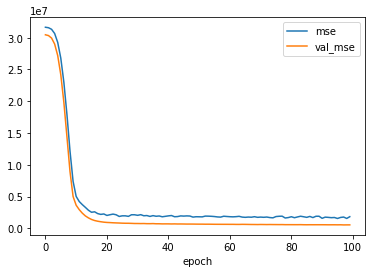

In [12]:
df_hist6 = pd.DataFrame(hist6.history)
df_hist6["epoch"] = hist6.epoch
df_hist6[["epoch", "mse", "val_mse"]].plot.line(x = "epoch")

In [13]:
pred = model6.predict(df_test_nor).transpose()[0]
print(mean_squared_error(y_true = df_test["price"], y_pred = pred),
      mean_absolute_percentage_error(y_true = df_test["price"], y_pred = pred))
df_check = pd.DataFrame({"y_true": df_test["price"],
                         "y_pred": pred}).reset_index(drop = True)
df_check["error"] = df_check["y_pred"] - df_check["y_true"]
df_check.head()

587684.9980338782 0.12577754571927063


y_true       y_pred       error
0     802   829.961731   27.961731
1     935   739.521912 -195.478088
2    5826  6195.306641  369.306641
3     935   996.110046   61.110046
4    2817  2505.304932 -311.695068

In [14]:
hist7 = model6.fit(df_train_nor, df_train["price"],
                   epochs = 100, 
                   validation_split = 0.2, 
                   verbose = 1)

Epoch 1/100
944/944 [==============================] - 1s 789us/step - loss: 1724797.0000 - mae: 677.8730 - mse: 1724797.0000 - val_loss: 536336.4375 - val_mae: 416.8439 - val_mse: 536336.4375
Epoch 2/100
944/944 [==============================] - 1s 821us/step - loss: 1651362.1250 - mae: 673.4426 - mse: 1651362.1250 - val_loss: 530395.6875 - val_mae: 414.5045 - val_mse: 530395.6875
Epoch 3/100
944/944 [==============================] - 1s 884us/step - loss: 1856834.1250 - mae: 681.2056 - mse: 1856834.1250 - val_loss: 535828.6875 - val_mae: 416.1069 - val_mse: 535828.6875
Epoch 4/100
944/944 [==============================] - 1s 789us/step - loss: 1745361.0000 - mae: 678.8784 - mse: 1745361.0000 - val_loss: 524194.4375 - val_mae: 412.4388 - val_mse: 524194.4375
Epoch 5/100
944/944 [==============================] - 1s 843us/step - loss: 1575965.0000 - mae: 676.9117 - mse: 1575965.0000 - val_loss: 525239.5625 - val_mae: 411.9835 - val_mse: 525239.5625
Epoch 6/100
944/944 [==============

944/944 [==============================] - 1s 1ms/step - loss: 1566851.0000 - mae: 653.3354 - mse: 1566851.0000 - val_loss: 500099.4375 - val_mae: 396.4384 - val_mse: 500099.4375
Epoch 44/100
944/944 [==============================] - 1s 983us/step - loss: 1658483.5000 - mae: 649.8199 - mse: 1658483.5000 - val_loss: 503626.8750 - val_mae: 397.9233 - val_mse: 503626.8750
Epoch 45/100
944/944 [==============================] - 1s 1ms/step - loss: 1597808.2500 - mae: 645.8801 - mse: 1597808.2500 - val_loss: 501240.2188 - val_mae: 396.3403 - val_mse: 501240.2188
Epoch 46/100
944/944 [==============================] - 1s 963us/step - loss: 1583725.7500 - mae: 646.1790 - mse: 1583725.7500 - val_loss: 513730.6562 - val_mae: 401.3350 - val_mse: 513730.6562
Epoch 47/100
944/944 [==============================] - 1s 973us/step - loss: 1560789.6250 - mae: 647.6589 - mse: 1560789.6250 - val_loss: 491305.3438 - val_mae: 392.3793 - val_mse: 491305.3438
Epoch 48/100
944/944 [=========================

Epoch 86/100
944/944 [==============================] - 1s 1ms/step - loss: 1544110.8750 - mae: 632.9417 - mse: 1544110.8750 - val_loss: 493014.9375 - val_mae: 392.9852 - val_mse: 493014.9375
Epoch 87/100
944/944 [==============================] - 1s 1ms/step - loss: 1425861.1250 - mae: 629.1437 - mse: 1425861.1250 - val_loss: 498613.3750 - val_mae: 395.2022 - val_mse: 498613.3750
Epoch 88/100
944/944 [==============================] - 1s 1ms/step - loss: 1568110.6250 - mae: 622.7642 - mse: 1568110.6250 - val_loss: 485936.0000 - val_mae: 389.8476 - val_mse: 485936.0000
Epoch 89/100
944/944 [==============================] - 1s 1ms/step - loss: 1395748.2500 - mae: 625.8288 - mse: 1395748.2500 - val_loss: 504395.2500 - val_mae: 396.7890 - val_mse: 504395.2500
Epoch 90/100
944/944 [==============================] - 1s 1ms/step - loss: 1529869.3750 - mae: 628.6280 - mse: 1529869.3750 - val_loss: 499238.3125 - val_mae: 394.8958 - val_mse: 499238.3125
Epoch 91/100
944/944 [==================

<AxesSubplot:xlabel='epoch'>

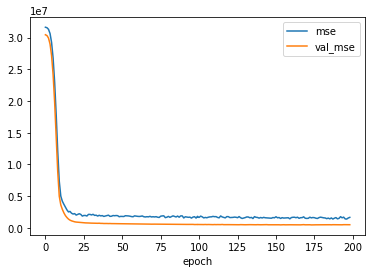

In [16]:
df_hist7 = pd.DataFrame(hist7.history)
df_hist7["epoch"] = hist7.epoch
df_hist7["epoch"] = df_hist7["epoch"] + df_hist6["epoch"].max()
df_hist = pd.concat([df_hist6, df_hist7])
df_hist[["epoch", "mse", "val_mse"]].plot.line(x = "epoch")

<AxesSubplot:xlabel='epoch'>

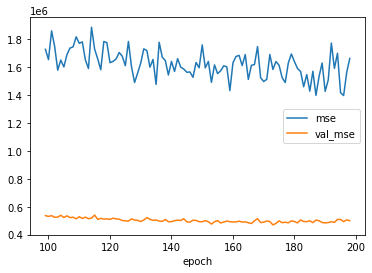

In [17]:
df_hist[["epoch", "mse", "val_mse"]][100:].plot.line(x = "epoch")

In [19]:
pred = model6.predict(df_test_nor).transpose()[0]
print(mean_squared_error(y_true = df_test["price"], y_pred = pred),
      mean_absolute_percentage_error(y_true = df_test["price"], y_pred = pred))
df_check = pd.DataFrame({"y_true": df_test["price"],
                         "y_pred": pred}).reset_index(drop = True)
df_check["error"] = df_check["y_pred"] - df_check["y_true"]
df_check.head()

546399.601006871 0.12293142273974364


y_true       y_pred       error
0     802   837.184631   35.184631
1     935   944.110901    9.110901
2    5826  5946.922363  120.922363
3     935  1023.337585   88.337585
4    2817  2658.815918 -158.184082